In [82]:
import pandas as pd
import numpy as np
import numpy_financial as npf
from plotnine import *
from mizani.formatters import currency_format
from babel.numbers import format_currency, format_percent
import math
pd.set_option('mode.chained_assignment', None)

In [2]:
base_folder = 'C:\\Users\\karim\\Documents\\westgate\\data\\'

In [84]:
loans_requests_2022_df = pd.read_csv(base_folder + 'loans_disbursed_presto_2022.csv')

In [57]:
loans_requests_2023_df = pd.read_csv(base_folder + 'loans_disbursed_presto_2023.csv')

In [4]:
loans_requests_2024_df = pd.read_csv(base_folder + 'loans_disbursed_presto_2024.csv')

In [85]:
loans_requests_df = pd.concat([loans_requests_2022_df, loans_requests_2023_df, loans_requests_2024_df])
#loans_requests_df = loans_requests_2024_df

In [59]:
loans_requests_df.columns

Index(['Full Name', 'Loan #', 'Loan Id', 'Principal Amount', 'Pending Due',
       'Total Due Amount', 'Paid Amount', 'Loan Status Name', 'Released Date',
       'Balance Amount', 'release_date', 'release_year', 'release_month',
       'release_day'],
      dtype='object')

In [86]:
loans_requests_df['release_date'] = pd.to_datetime(loans_requests_df['Released Date'],
                                                    format='%d/%m/%Y')

In [87]:
loans_requests_df['release_year'] = loans_requests_df['release_date'].dt.year
loans_requests_df['release_month'] = loans_requests_df['release_date'].dt.month
loans_requests_df['release_day'] = loans_requests_df['release_date'].dt.day

In [88]:
loans_requests_df['release_year'] .value_counts()

release_year
2023    10146
2022     8718
2024     4251
Name: count, dtype: int64

In [ ]:
#loans_requests_2022_df = loans_requests_df[loans_requests_df['release_year']==2022]

In [89]:
not_disbursed = ['Not Taken Up', 'Denied']

loans_disbursed_df = loans_requests_df[~loans_requests_df['Loan Status Name'].isin(not_disbursed)]

In [104]:
repayments_2022_df = pd.read_csv(base_folder + 'repayments_presto_2022.csv')
repayments_2023_df = pd.read_csv(base_folder + 'repayments_presto_2023.csv')
repayments_2024_df = pd.read_csv(base_folder + 'repayments_presto_2024.csv')

repayments_df = pd.concat([repayments_2022_df, repayments_2023_df, repayments_2024_df])

In [105]:
repayments_df['collection_date'] = pd.to_datetime(repayments_df['Collection Date'],
                                                    format="%d/%m/%Y")
repayments_df['collection_year'] = repayments_df['collection_date'].dt.year
repayments_df['collection_month'] = repayments_df['collection_date'].dt.month

In [106]:
repayments_df['collection_year'].value_counts()

collection_year
2023    55309
2022    49258
2024    21803
Name: count, dtype: int64

In [107]:
loans_main_cols = ['Loan #', 'Loan Id', 'Released Date', 'release_date', 
                    'release_year', 'release_month', 'Principal Amount', 
                    'Loan Status Name', 'Total Due Amount', 'Pending Due']

In [108]:
repayments_df.columns

Index(['Borrower #', 'Borrower Name', 'Collection Date', 'Loan #', 'Loan Id',
       'Loan Balance Amount', 'Loan Product', 'Loan Status',
       'Total Paid Amount', 'Repayment Id', 'collection_date',
       'collection_year', 'collection_month'],
      dtype='object')

In [68]:
repayments_df

,Borrower #,Borrower Name,Collection Date,Loan #,Loan Id,Loan Balance Amount,Loan Product,Loan Status,Total Paid Amount,Repayment Id,collection_date,collection_year,collection_month
0,CID00000138824,Krystal Marie Alexander,02/01/2023,PR1011244,3782832,0.00,PrestoLoan,Fully Paid,98.80,23239973,2023-01-02,2023,1
1,CID00000143952,Joseph Littlejohn,02/01/2023,PR100000143952,3789731,822.58,PrestoLoan,Defaulted,52.72,23239977,2023-01-02,2023,1
2,CID0000010144,Saliha Demraoui,02/01/2023,PR1010210,3443668,0.00,PrestoLoan,Fully Paid,121.78,23241754,2023-01-02,2023,1
3,CID00000121834,Chelsey Roberge,02/01/2023,PR1010316,3500995,0.00,PrestoLoan,Fully Paid,102.79,23241759,2023-01-02,2023,1
4,CID00000122961,Jordon Michael Paul Tester,02/01/2023,PR100000122961,3516438,0.00,PrestoLoan,Fully Paid,102.79,23241760,2023-01-02,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21798,CID000001515,Mary Rose Dula-Ogon Tagacay,19/04/2024,PR1014947,5508614,0.00,PrestoLoan,Fully Paid,55.00,41510547,2024-04-19,2024,4
21799,CID2024567058539,Clifford Spencer,19/04/2024,PR202456705853,5738120,108.46,PrestoLoan,Defaulted,55.00,41510558,2024-04-19,2024,4
21800,CID0000074194,Patrice Chisholm,19/04/2024,PR1017348,6184155,153.94,PrestoLoan,Defaulted,311.00,41581449,2024-04-19,2024,4
21801,CID2024337132824,Karin Edlund,19/04/2024,PR202433713282,6195227,0.00,PrestoLoan,Fully Paid,451.95,41581563,2024-04-19,2024,4


In [109]:
repayment_main_cols = ['Loan #', 'Loan Id', 'Collection Date', 
                        'collection_date', 'Total Paid Amount']

In [24]:
# loans_copy = loans_disbursed_df[['Loan #', 'Loan Id', 'Released Date', 'Principal Amount']]
# loans_copy.rename(columns = {'Released Date': 'Collection Date', 
#                             'Principal Amount': 'Total Paid Amount'},
#                     inplace=True)
# loans_copy['collection_date'] = pd.to_datetime(loans_copy['Collection Date'],
#                                                 format='%d/%m/%Y')
# loans_copy['Total Paid Amount'] = -loans_copy['Total Paid Amount']

In [25]:
# repayments_with_origination_df = pd.concat([repayments_df, loans_copy])

In [110]:
merged_df = loans_disbursed_df[loans_main_cols].merge(
    repayments_df.rename(columns={'Loan #': 'Loan # Repayment'}),
    how='left', 
    left_on='Loan Id',
    right_on='Loan Id'
)

In [111]:
merged_df['days_since_release'] = (merged_df['collection_date'] - merged_df['release_date']).dt.days

merged_df['weeks_since_release'] = np.floor(merged_df['days_since_release'] / 7.0)

In [124]:
merged_df.to_csv('presto_merged.csv', index=False)

In [112]:
merged_df.sort_values(['release_year', 'release_month', 'Loan #', 'Collection Date']).head()

,Loan #,Loan Id,Released Date,release_date,release_year,release_month,Principal Amount,Loan Status Name,Total Due Amount,Pending Due,...,Loan Balance Amount,Loan Product,Loan Status,Total Paid Amount,Repayment Id,collection_date,collection_year,collection_month,days_since_release,weeks_since_release
36,PR10000076469,2611314,04/01/2022,2022-01-04,2022,1,300.0,Defaulted,758.58,758.58,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
51,PR10000076482,2611361,04/01/2022,2022-01-04,2022,1,300.0,Fully Paid,618.65,0.00,...,0.0,PrestoLoan,Fully Paid,98.93,15614607.0,2022-02-11,2022.0,2.0,38.0,5.0
49,PR10000076482,2611361,04/01/2022,2022-01-04,2022,1,300.0,Fully Paid,618.65,0.00,...,0.0,PrestoLoan,Fully Paid,98.93,15002341.0,2022-01-14,2022.0,1.0,10.0,1.0
53,PR10000076482,2611361,04/01/2022,2022-01-04,2022,1,300.0,Fully Paid,618.65,0.00,...,0.0,PrestoLoan,Fully Paid,99.00,16323436.0,2022-03-16,2022.0,3.0,71.0,10.0
54,PR10000076482,2611361,04/01/2022,2022-01-04,2022,1,300.0,Fully Paid,618.65,0.00,...,0.0,PrestoLoan,Fully Paid,25.00,16347713.0,2022-03-17,2022.0,3.0,72.0,10.0


Q1 repayments View

In [120]:
disbursed_df = loans_disbursed_df.groupby(['release_year', 'release_month'])['Principal Amount'].sum().reset_index()
disbursed_df

,release_year,release_month,Principal Amount
0,2022,1,273574.23
1,2022,2,246090.88
2,2022,3,246007.01
3,2022,4,205888.82
4,2022,5,194299.20
5,2022,6,236956.22
6,2022,7,113250.82
7,2022,8,188921.08
8,2022,9,232974.00
9,2022,10,283598.54


In [121]:
collected_df = merged_df.groupby(['release_year', 'release_month', 'collection_year', 'collection_month'])['Total Paid Amount'].sum().reset_index()
collected_df
# q1_view['% Principal Collected'] = q1_view['Total Paid Amount'] / q1_view['Principal Amount']
# q1_view['% Principal Collected'] = q1_view['% Principal Collected'].apply(lambda n: format_percent(n))
# q1_view['Disbursed'] = q1_view['Principal Amount'].apply(lambda n: format_currency(n, currency='CAD'))
# q1_view['Collected'] = q1_view['Total Paid Amount'].apply(lambda n: format_currency(n, currency='CAD'))
# q1_view[['Disbursed', 'Collected', '% Principal Collected']]

,release_year,release_month,collection_year,collection_month,Total Paid Amount
0,2022,1,2022.0,1.0,52166.55
1,2022,1,2022.0,2.0,113973.97
2,2022,1,2022.0,3.0,108295.19
3,2022,1,2022.0,4.0,78513.48
4,2022,1,2022.0,5.0,38279.40
...,...,...,...,...,...
399,2024,2,2024.0,3.0,160897.71
400,2024,2,2024.0,4.0,94815.78
401,2024,3,2024.0,3.0,45634.68
402,2024,3,2024.0,4.0,80460.65


In [123]:
monthly_df = collected_df.merge(disbursed_df, how='left', on=['release_year', 'release_month'])
monthly_df.to_csv('presto_monthly_cashflows.csv', index=False)

Q1 monthly view

In [74]:
merged_q1_df.groupby(['release_year', 'release_month', 'collection_month'])[['Total Paid Amount']].sum()

Total Paid Amount
release_year release_month collection_month                   
2023         1             1.0                        55986.54
                           2.0                       117415.64
                           3.0                       127313.41
             2             1.0                          513.94
                           2.0                        21448.93
                           3.0                        94132.70
             3             1.0                          593.30
                           2.0                          612.82
                           3.0                        70164.73
             4             1.0                          924.65
                           2.0                          791.86
                           3.0                         2140.26
             5             1.0                         1060.00
                           2.0                          817.62
                           3.0                          534.56
             6             1.0                         1627.04
                           2.0                         2611.01
                           3.0                          883.25
             7             1.0                         2663.82
                           2.0                         2835.14
                           3.0                         1985.22
             8             1.0                         4732.42
                           2.0                         2987.29
                           3.0                         1848.56
             9             1.0                        24148.83
                           2.0                         5083.84
                           3.0                         2564.10
             10            1.0                        78409.93
                           2.0                        36856.99
                           3.0                        10139.58
             11            1.0                       136042.96
                           2.0                       123072.67
                           3.0                        79762.31
             12            1.0                       115473.95
                           2.0                       108932.74
                           3.0                        97253.96
2024         1             1.0                        44958.23
                           2.0                       128357.87
                           3.0                       107031.59
             2             2.0                        70998.74
                           3.0                       160897.71
             3             3.0                        45634.68

In [29]:
merged_df['Loan Id'].nunique()

2974

Check whether the pending balances are in line (calculated by me VS stated in the loans data)

In [30]:
check_df = merged_df.groupby('Loan #').agg({'Principal Amount': 'max',
                                            'Total Due Amount': 'max', 
                                            'Total Paid Amount':'sum',
                                            'Pending Due': 'max'})

In [31]:
check_df['Pending Due Calculated'] = (
    check_df['Total Due Amount'] - (check_df['Total Paid Amount'] + check_df['Principal Amount'])
)

check_df

,Principal Amount,Total Due Amount,Total Paid Amount,Pending Due,Pending Due Calculated
Loan #,,,,,
PR1015449,600.0,1152.39,168.24,0.0,384.15
PR1015450,450.0,827.50,285.52,0.0,91.98
PR1015452,400.0,400.00,0.00,0.0,0.00
PR1015454,400.0,918.56,211.70,0.0,306.86
PR1015455,400.0,815.56,313.58,0.0,101.98
...,...,...,...,...,...
PR20249712934,450.0,917.50,-450.00,0.0,917.50
PR20249713032,375.0,719.59,-375.00,0.0,719.59
PR20249713101,400.0,815.56,-400.00,0.0,815.56


In [32]:
# these don't balance for some reason (most likely repayments in 2024)
not_balancing = check_df[np.abs(check_df['Pending Due Calculated'] - check_df['Pending Due']) > 1]
not_balancing

,Principal Amount,Total Due Amount,Total Paid Amount,Pending Due,Pending Due Calculated
Loan #,,,,,
PR1015449,600.0,1152.39,168.24,0.0,384.15
PR1015450,450.0,827.50,285.52,0.0,91.98
PR1015454,400.0,918.56,211.70,0.0,306.86
PR1015455,400.0,815.56,313.58,0.0,101.98
PR1015458,600.0,1152.39,120.30,0.0,432.09
...,...,...,...,...,...
PR20249712934,450.0,917.50,-450.00,0.0,917.50
PR20249713032,375.0,719.59,-375.00,0.0,719.59
PR20249713101,400.0,815.56,-400.00,0.0,815.56


In [ ]:
(not_balancing['Pending Due Calculated'] - not_balancing['Pending Due']).mean()

==> Pending balance calculation looks good enough.

Group the cashflows by `days_since_release`

In [33]:
cashflows_weekly_df = merged_df.groupby(['release_year', 'weeks_since_release'])[['Total Paid Amount']].sum().reset_index()
cashflows_weekly_df

,release_year,weeks_since_release,Total Paid Amount
0,2024,-1.0,451.91
1,2024,0.0,-1169065.02
2,2024,1.0,134583.60
3,2024,2.0,94851.56
4,2024,3.0,103634.05
5,2024,4.0,70974.30
6,2024,5.0,87042.96
7,2024,6.0,59226.99
8,2024,7.0,65390.31
9,2024,8.0,43421.92


In [ ]:
cashflows_weekly_df['weeks_since_release'].value_counts()

In [34]:
merged_df = merged_df[merged_df['weeks_since_release'] >= 0]

In [35]:
cashflows_weekly_df = cashflows_weekly_df[cashflows_weekly_df['weeks_since_release'] >= 0]

Do 2022 first

In [ ]:
cashflows_weekly_2022_df = cashflows_weekly_df[cashflows_weekly_df['release_year']==2022]

In [ ]:
cashflows_weekly_2022_df['cumul_cashflow'] = cashflows_weekly_2022_df['Total Paid Amount'].cumsum()

In [ ]:
cashflows_weekly_2022_df.to_csv('cashflow_weekly_2022_originations.csv', index=False)

In [ ]:
# Weekly IRR
weekly_irr = npf.irr(cashflows_weekly_2022_df['Total Paid Amount'])
weekly_irr

In [ ]:
# Yearly IRR
(1+weekly_irr)**52 - 1

In [ ]:
(
    ggplot(cashflows_weekly_2022_df.query('week <= 60'))
    + aes(x='week', y='Total Paid Amount')
    + geom_bar(stat='identity')
)

In [ ]:
(
    ggplot(cashflows_weekly_2022_df.query('week <= 60'))
    + aes(x='week', y='cumul_cashflow')
    + geom_point(color='green')
    #+ geom_line()
    + ggtitle('IF loans disbursed 2022')
    + xlab('Weeks since orgination')
    + ylab('Cumulative cashflow')
    + scale_y_continuous(labels=currency_format(precision=0, big_mark=','))
)

Now do 2022 + 2023 + 2024

In [450]:
cashflows_weekly_df.to_csv('cashflows_weekly.csv', index=False)

In [36]:
cashflows_weekly_df['release_year'].value_counts()

release_year
2024    16
Name: count, dtype: int64

In [38]:
cashflows_weekly_by_year_groups = cashflows_weekly_df.groupby('release_year')
df_list = []

for year, cashflows_weekly_year_df in cashflows_weekly_by_year_groups:

    # all_weeks_df = pd.DataFrame({'week': np.arange(0, cashflows_weekly_year_df['weeks_since_release'].max())})

    # cashflow_weekly_df = all_weeks_df.merge(cashflows_year_df, 
    #                                 left_on='week', 
    #                                 right_on='weeks_since_release', 
    #                                 how='left')

    # cashflow_weekly_df.fillna(0, inplace=True)

    cashflows_weekly_year_df['cumul_cashflow'] = cashflows_weekly_year_df['Total Paid Amount'].cumsum()

    cashflows_weekly_year_df['cumul_cashflow_normalized'] = (
        cashflows_weekly_year_df['cumul_cashflow'] 
        / abs(cashflows_weekly_year_df['cumul_cashflow'].iloc[0]) 
        * 1000000
    )

    df_list.append(cashflows_weekly_year_df)

cashflows_weekly_cumul_df = pd.concat(df_list)


In [39]:
cashflows_weekly_cumul_df['release_year'].value_counts()

release_year
2024    16
Name: count, dtype: int64

In [41]:
cashflows_weekly_cumul_df['release_year'] = cashflows_weekly_cumul_df['release_year'].astype(int).astype(str)

C:\Users\karim\Documents\Westgate\.env-flaml\lib\site-packages\plotnine\guides\guides.py:207: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


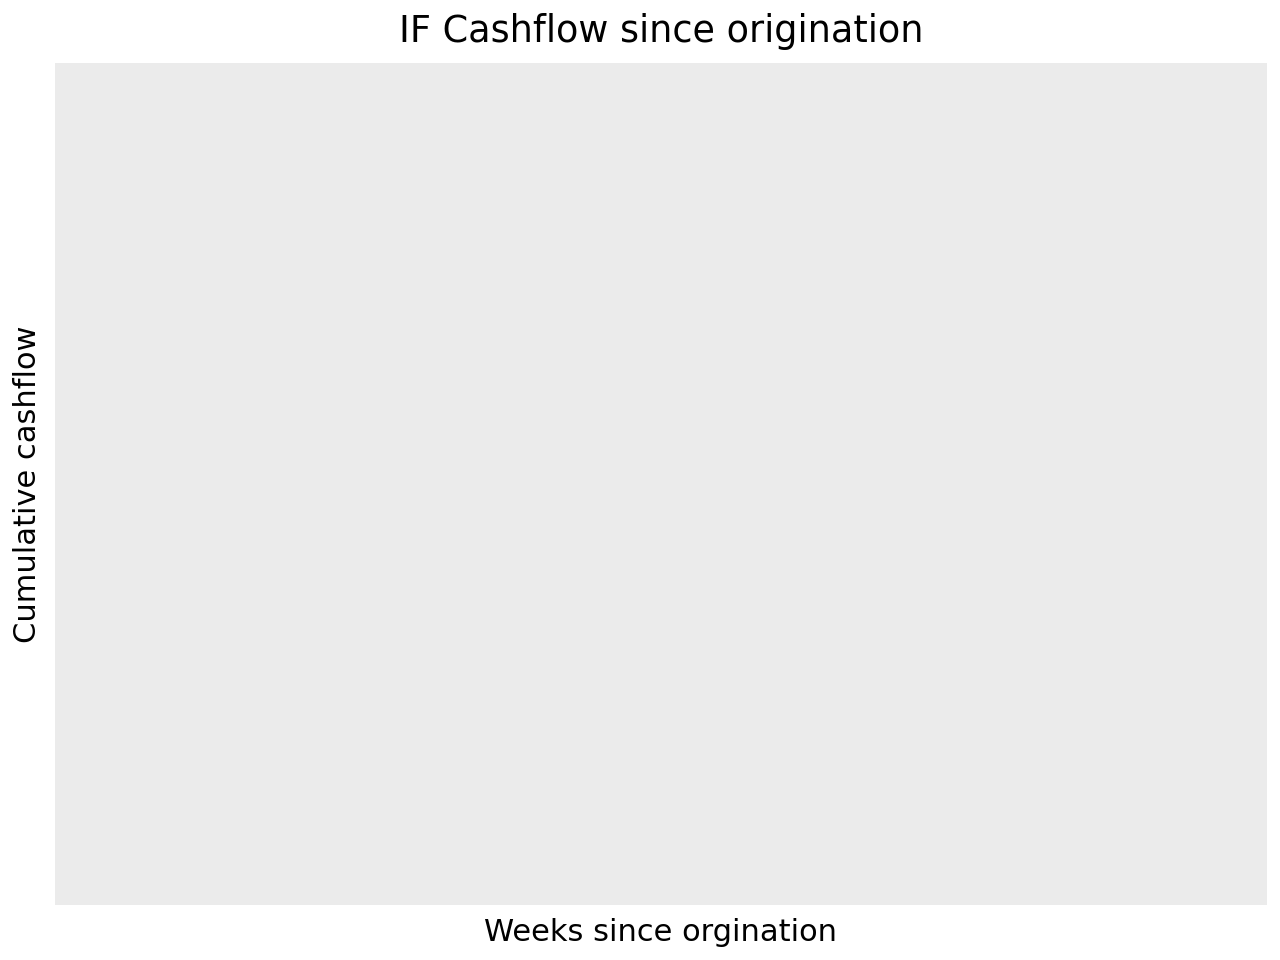

In [42]:
(
    ggplot(cashflows_weekly_cumul_df.query('(weeks_since_release <= 60) & (release_year < "2024")'))
    + aes(x='weeks_since_release', y='Total Paid Amount')
    + geom_bar(stat='identity')
    + ggtitle('IF Cashflow since origination')
    + xlab('Weeks since orgination')
    + ylab('Cumulative cashflow')
    + scale_y_continuous(labels=currency_format(precision=0, big_mark=','))
    + scale_color_manual(values=['lightblue', 'blue', 'darkblue'])
)

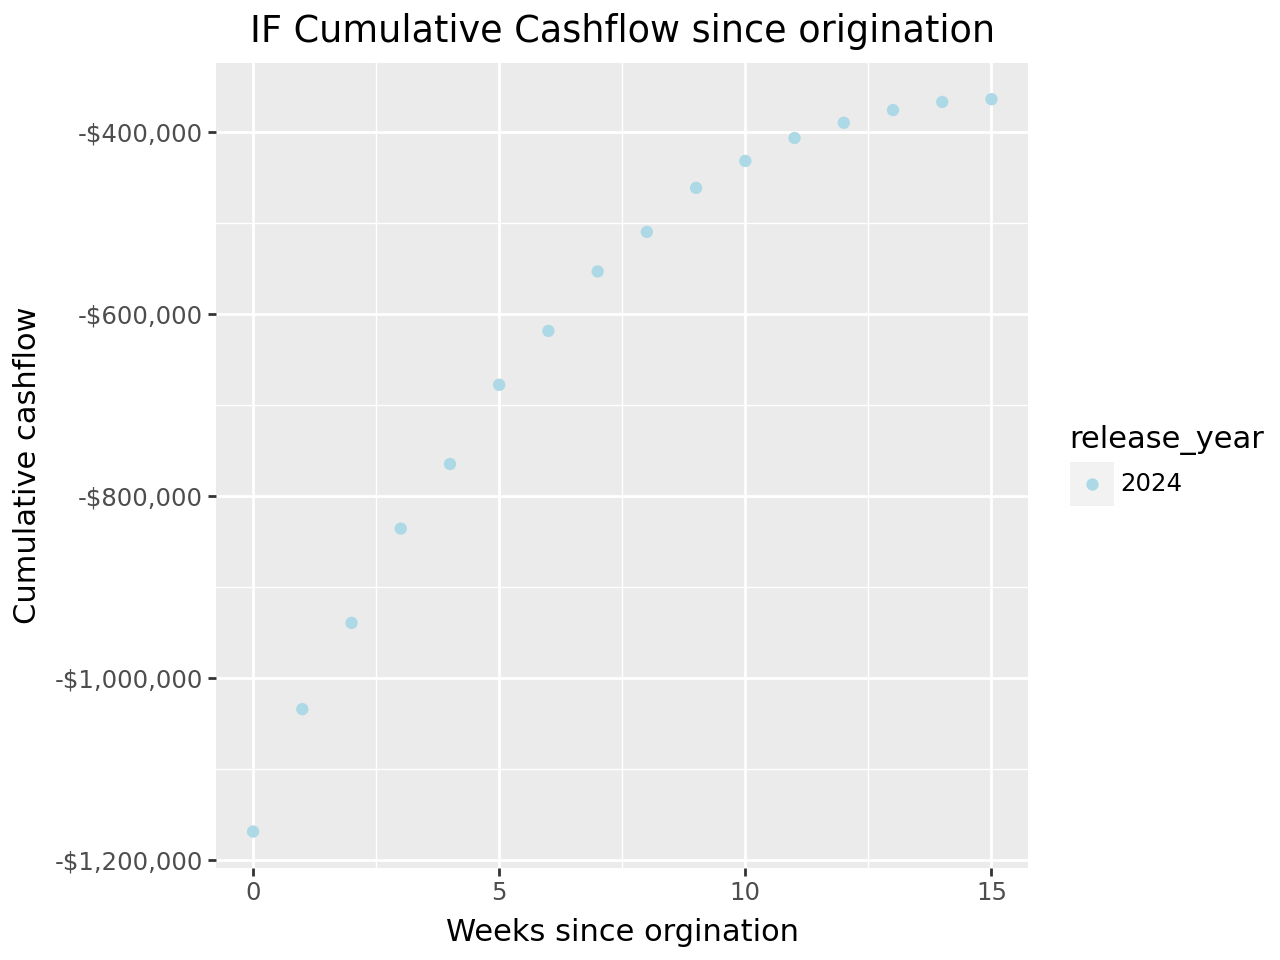

In [43]:
(
    ggplot(cashflows_weekly_cumul_df.query('(weeks_since_release <= 60) & (release_year <= "2024")'))
    + aes(x='weeks_since_release', y='cumul_cashflow')
    + geom_point(aes(group='release_year', color='release_year'))
    #+ geom_line()
    + ggtitle('IF Cumulative Cashflow since origination')
    + xlab('Weeks since orgination')
    + ylab('Cumulative cashflow')
    + scale_y_continuous(labels=currency_format(precision=0, big_mark=','))
    + scale_color_manual(values=['lightblue', 'blue', 'darkblue'])
)

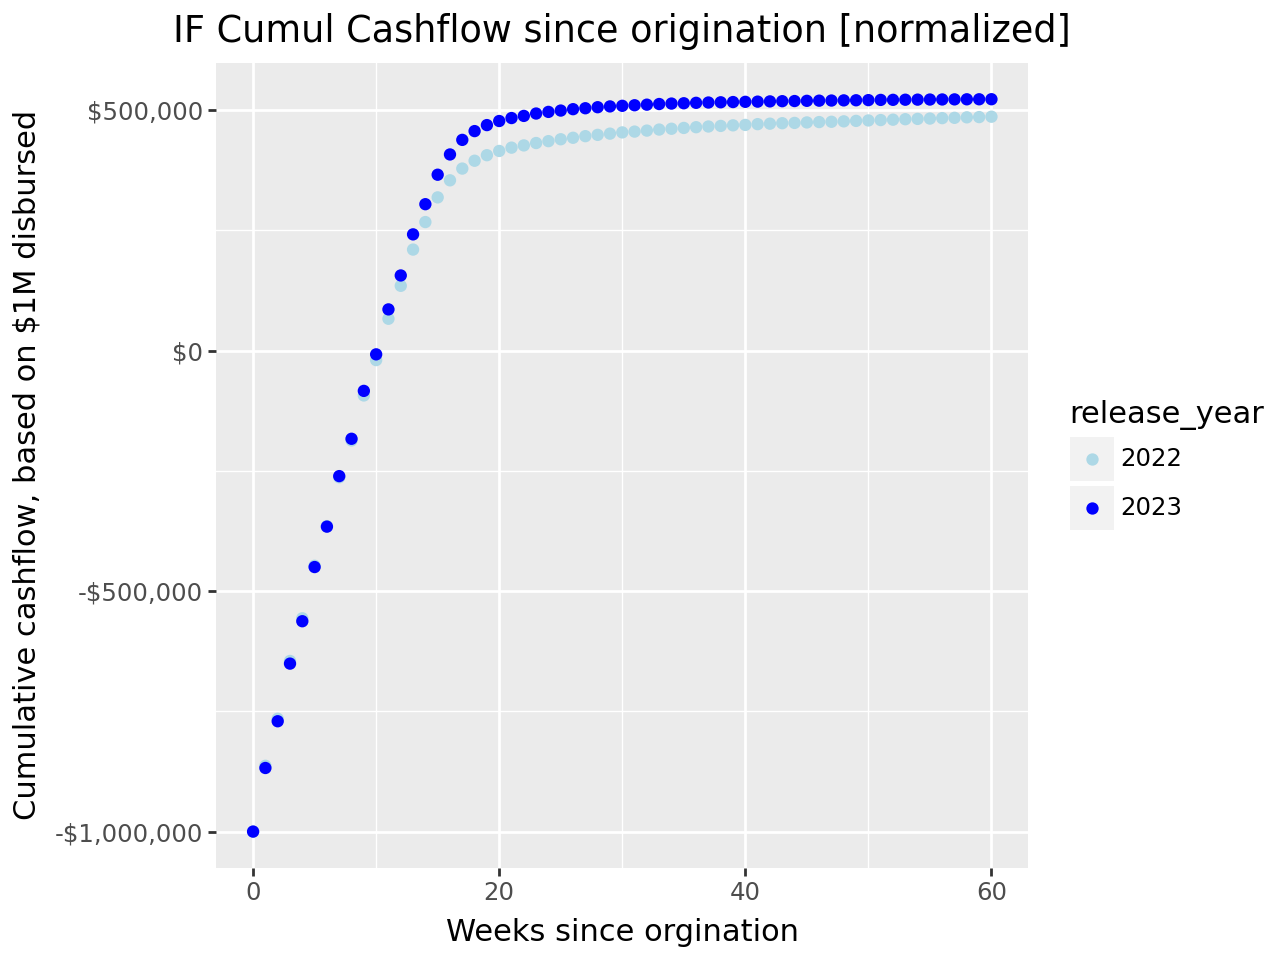

In [465]:
(
    ggplot(cashflows_weekly_cumul_df.query('(weeks_since_release <= 60) & (release_year < "2024")'))
    + aes(x='weeks_since_release', y='cumul_cashflow_normalized')
    + geom_point(aes(group='release_year', color='release_year'))
    #+ geom_line(aes(group='release_year', color='release_year'))
    + ggtitle('IF Cumul 
    Cashflow since origination [normalized]')
    + xlab('Weeks since orgination')
    + ylab('Cumulative cashflow, based on $1M disbursed')
    + scale_y_continuous(labels=currency_format(precision=0, big_mark=','))
    + scale_color_manual(values=['lightblue', 'blue', 'darkblue'])
)

Compare 2024 to 2023 and 2022 using same cut-off as 2024

In [440]:
merged_df['release_day'] = merged_df['release_date'].dt.day

In [441]:
merged_df['collection_year'] = merged_df['collection_date'].dt.year
merged_df['collection_month'] = merged_df['collection_date'].dt.month
merged_df['collection_day'] = merged_df['collection_date'].dt.day

In [443]:
cutoff_weeks = merged_df[merged_df['release_year']==2024]['weeks_since_release'].max()
cutoff_weeks

15.0

In [451]:
merged_filtered_df = merged_df[
    (merged_df['weeks_since_release'] <= cutoff_weeks)
    & (merged_df['release_month'] <= 3)
]
    
cashflows_filtered_df = merged_filtered_df.groupby(['release_year', 'weeks_since_release'])[['Total Paid Amount']].sum().reset_index()
cashflows_filtered_df['release_year'].value_counts()

release_year
2022    16
2023    16
2024    16
Name: count, dtype: int64

In [457]:
merged_filtered_df['release_month'].value_counts()

release_month
1    19774
2    17591
3    15107
Name: count, dtype: int64

In [458]:
cashflows_filtered_by_year_groups = cashflows_filtered_df.groupby('release_year')
df_list = []

for year, cashflows_year_df in cashflows_filtered_by_year_groups:

    cashflows_year_df['cumul_cashflow'] = cashflows_year_df['Total Paid Amount'].cumsum()

    cashflows_year_df['cumul_cashflow_normalized'] = (
        cashflows_year_df['cumul_cashflow'] 
        / abs(cashflows_year_df['cumul_cashflow'].iloc[0]) 
        * 1000000
    )

    df_list.append(cashflows_year_df)

cashflows_weekly_filtered_cumul_df = pd.concat(df_list)


In [459]:
cashflows_weekly_filtered_cumul_df['release_year'] = cashflows_weekly_filtered_cumul_df['release_year'].astype(int).astype(str)

In [460]:
cashflows_weekly_filtered_cumul_df['release_year'].value_counts()

release_year
2022    16
2023    16
2024    16
Name: count, dtype: int64

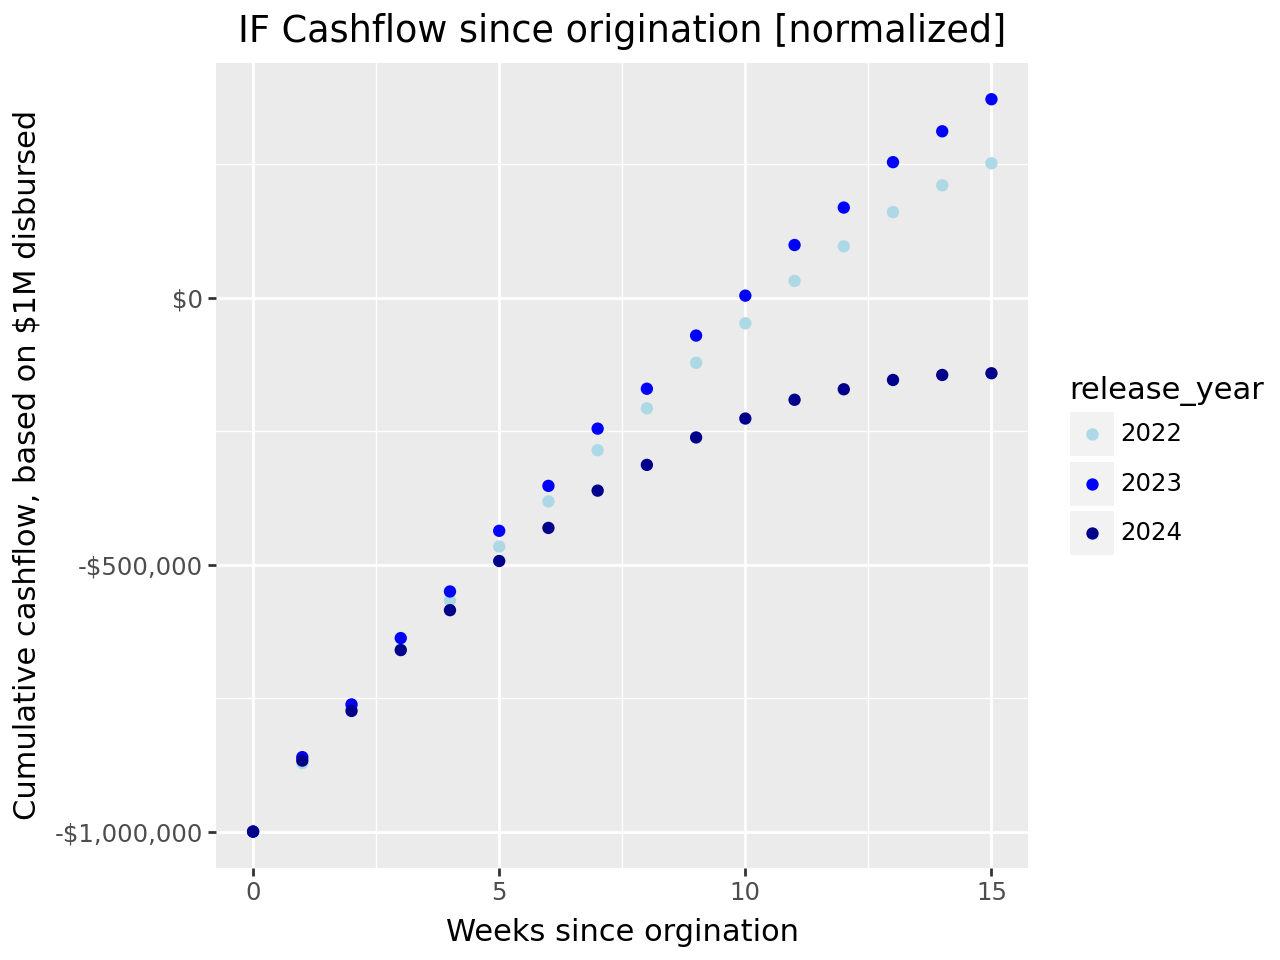

In [461]:
(
    ggplot(cashflows_weekly_filtered_cumul_df.query('weeks_since_release <= 60'))
    + aes(x='weeks_since_release', y='cumul_cashflow_normalized')
    + geom_point(aes(group='release_year', color='release_year'))
    #+ geom_line(aes(group='release_year', color='release_year'))
    + ggtitle('IF Cashflow since origination [normalized]')
    + xlab('Weeks since orgination')
    + ylab('Cumulative cashflow, based on $1M disbursed')
    + scale_y_continuous(labels=currency_format(precision=0, big_mark=','))
    + scale_color_manual(values=['lightblue', 'blue', 'darkblue'])
)